In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import math

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [517]:
source = 'pecan_street'
place = 'austin'
interval = 'house_energy_compressed'
house_no = 4373

# Pecan Street

In [518]:
dataset = pd.read_csv(f'../Dataset/{source}/{place}/{interval}/{house_no}_compressed.csv')

In [519]:
dataset.shape[0]

34532

In [520]:
dataset[dataset['ev_car'] > 1].shape[0]

4455

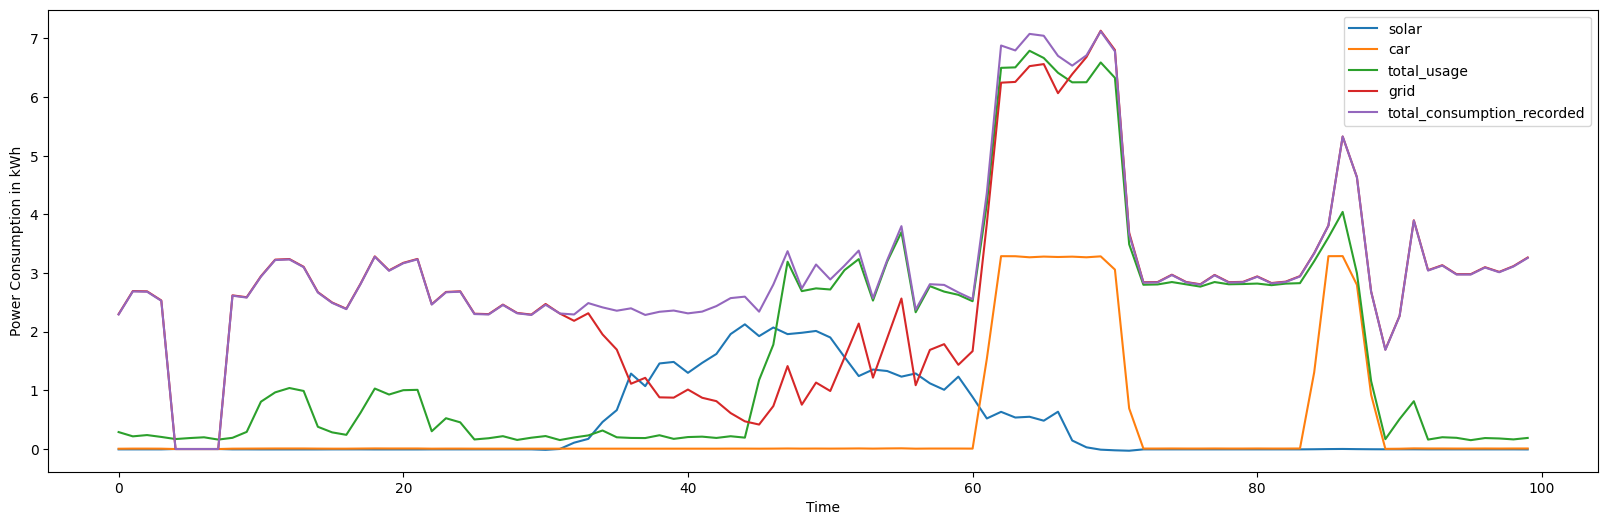

In [497]:
plt.figure(figsize=(20,6))
plt.xlabel('Time')
plt.ylabel('Power Consumption in kWh')
plt.plot(dataset['solar'][0:100], label='solar')
plt.plot(dataset['ev_car'][:100], label='car')
plt.plot(dataset['total_usage'][:100], label='total_usage')
plt.plot(dataset['grid'][:100], label='grid')
plt.plot(dataset['total_power_consumption'][:100], label='total_consumption_recorded')
plt.legend()
# plt.savefig(f'data_analysis_figures/{source}/{place}/house_no_{house_no}/{house_no}_overall_power_consumption.png')
plt.show()

In [498]:
dataset.head(20)

,dataid,local_15min,house_type,ev_car,solar,grid,total_power_consumption,total_usage
0,8156,2018-01-01 00:00:00-06:00,Single-Family Home 001 (Master),0.005,-0.006,2.300,2.294,0.289
1,8156,2018-01-01 00:15:00-06:00,Single-Family Home 001 (Master),0.007,-0.006,2.693,2.687,0.216
2,8156,2018-01-01 00:30:00-06:00,Single-Family Home 001 (Master),0.007,-0.006,2.688,2.682,0.238
3,8156,2018-01-01 00:45:00-06:00,Single-Family Home 001 (Master),0.006,-0.006,2.533,2.527,0.206
4,8156,2018-01-01 01:00:00-06:00,Single-Family Home 001 (Master),0.000,0.000,0.000,0.000,0.170
5,8156,2018-01-01 01:15:00-06:00,Single-Family Home 001 (Master),0.000,0.000,0.000,0.000,0.187
6,8156,2018-01-01 01:30:00-06:00,Single-Family Home 001 (Master),0.000,0.000,0.000,0.000,0.200
7,8156,2018-01-01 01:45:00-06:00,Single-Family Home 001 (Master),0.000,0.000,0.000,0.000,0.161
8,8156,2018-01-01 02:00:00-06:00,Single-Family Home 001 (Master),0.006,-0.006,2.620,2.614,0.191
9,8156,2018-01-01 02:15:00-06:00,Single-Family Home 001 (Master),0.007,-0.006,2.588,2.582,0.292


In [499]:
dataset[dataset['total_power_consumption'] <= 0]

,dataid,local_15min,house_type,ev_car,solar,grid,total_power_consumption,total_usage
4,8156,2018-01-01 01:00:00-06:00,Single-Family Home 001 (Master),0.0,0.0,0.0,0.0,0.170
5,8156,2018-01-01 01:15:00-06:00,Single-Family Home 001 (Master),0.0,0.0,0.0,0.0,0.187
6,8156,2018-01-01 01:30:00-06:00,Single-Family Home 001 (Master),0.0,0.0,0.0,0.0,0.200
7,8156,2018-01-01 01:45:00-06:00,Single-Family Home 001 (Master),0.0,0.0,0.0,0.0,0.161


# Open Power System

In [453]:
data = pd.read_csv(f'../Dataset/{source}/{place}/{interval}/{house_no}_compressed.csv')

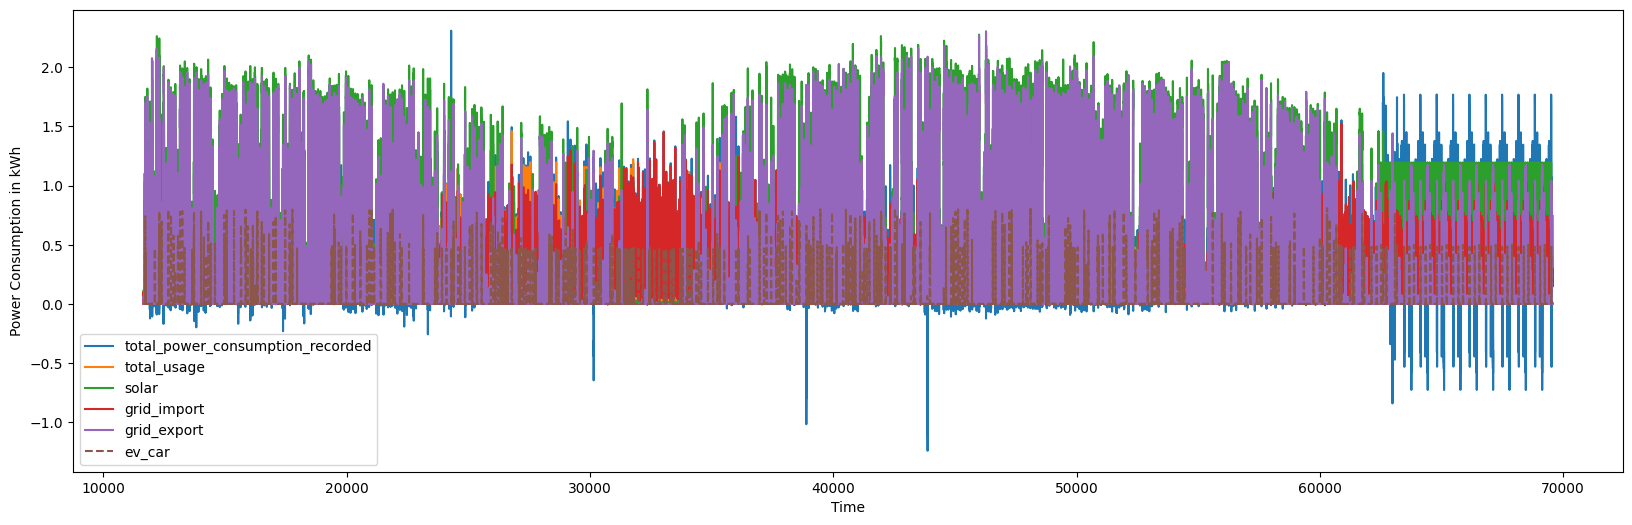

In [457]:
start = 11650
end = 118000
plt.figure(figsize=(20,6))
plt.xlabel('Time')
plt.ylabel('Power Consumption in kWh')
plt.plot(data['total_power_consumption'][start:end], label='total_power_consumption_recorded')
plt.plot(data['total_usage'][start:end], label='total_usage')
plt.plot(data['solar'][start:end], label='solar')
plt.plot(data['grid_import'][start:end], label='grid_import')
plt.plot(data['grid_export'][start:end], label='grid_export')
plt.plot(data['ev_car'][start:end], label='ev_car', linestyle='--')
plt.legend()
# plt.savefig(f'data_analysis_figures/{source}/{house_no}_overall_power_consumption.png')
plt.show()

In [458]:
data[data['ev_car'] > 0.5].shape[0] * 100 / data.shape[0]

1.2723012119208155

In [ ]:
data[(data['total_power_consumption'] < 0)].head(50)

In [456]:
data = data[data['local_15min'] < '2018-02-04 23:15:00+00:00' ]
data[(data['total_power_consumption'] == 0) & (data['grid_export'] == 0)]

,local_15min,house_type,interpolated,total_usage,ev_car,solar,grid_import,grid_export,total_power_consumption


In [459]:
data['ev_car'].describe()

count    69559.000000
mean         0.027509
std          0.110348
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.809000
Name: ev_car, dtype: float64